<a href="https://colab.research.google.com/github/giftajayi/NPRI-Project/blob/main/NPRI_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question: Based on NPRI data, which industry is predicted to have the highest growth of releases in 2023? Which will have the largest decline?

Moyosore Akinola - makinola@norquest.ca

Gift Ajayi - gajayi@norquest.ca

Oluwaseun Ademokun - oademokun@norquest.ca

Chioma Ulom - culom@norquest.ca

UNDERSTANDING THE DATA

What is the NPRI?

NPRI (National Pollutant Release Inventory) is Canada's primary source of information on pollutants released to the environment, disposed of, or transferred for recycling. Managed by Environment and Climate Change Canada (ECCC), the NPRI tracks a wide range of substances that are considered harmful to human health or the environment. Industries that meet certain thresholds are required to report their releases, disposals, and transfers of pollutants annually.

The NPRI serves multiple purposes:
Environmental Protection: Helps monitor pollution and supports the development of policies to reduce environmental harm. Public Right-to-Know: Provides transparency on what pollutants are being emitted and by whom, enabling citizens and stakeholders to hold industries accountable. Tracking Progress: Allows the government to track trends in pollution and assess the effectiveness of environmental regulations and programs. Research and Decision-Making: Used by researchers, non-governmental organizations, and policymakers to inform decisions on environmental health.

DATA RELEVANCE
This dataset includes data reported to the NPRI by various industries over two decades (2000–2020). It provides details about pollutants released into air, water, and land, as well as waste disposal and transfers for recycling. This data is critical for understanding:

Industry-Specific Environmental Impact: By analyzing the releases and disposals, one can identify which industries (e.g., chemical manufacturing, mining, pulp mills) are responsible for the highest pollutant emissions and track their trends over time.

Geographic Distribution of Pollution: The data includes information on the locations of the facilities (e.g., city, province), which helps map pollution hotspots across Canada and see which regions are most affected.

Compliance and Regulatory Insight: The NPRI data helps track whether companies are complying with environmental regulations or if additional enforcement is needed to mitigate pollution in particular areas or industries.

Progress Toward Sustainability Goals: NPRI data allows organizations, including NGOs or government agencies, to evaluate if pollution is being reduced and whether sustainability goals are being met.

INSIGHTS FROM THE DATA
RUNDERSTANDING OF DATASET
1. RELEASES
Dataset contains releases of substances from year 2000 - 2022 from majorly from majorly 5 industries: Conventional oil and gas extraction, oil and gas extraction (except oil sands), fossil fuel electric power generation, chemical pulp mills and petroleum refineries
Substances comprise mostly of Particulate matter <= 2.5 Micrometers, Particulate matter <=10 Micrometers, Nitrogen oxides, Carbon monoxide, Volatile organic compounds.
Contains 737516 rows and 28 columns
Releases are from different provinces in Canada.
The units of these releases vary with tonnes, kg,g TEQ, grams

2. DISPOSALS AND TRANSFERS
Dataset contains releases of substances from year 2000 - 2022 from majorly from majorly 5 industries: Sewage treatment facilities, Conventional oil and gas extraction, Petroleum refineries, Waste disposal treatment and disposal, Chemical pulp mills.
Substances comprise mostly of Lead, Zinc, Manganese, Copper, Xylene
Contains 191645 rows and 41 columns.
Disposal are from different provinces in Canada.
The units of these disposals vary with tonnes, kg,g TEQ, grams

3. COMMENTS
Data contain information of data collected for releases, disposals and transfers between year 2000- 2022 pertaining majorly to these industries: Conventional Oil and Gas Extraction, Oil and gas extraction (except oil sands), Sewage treatment facilities, Conventional oil and gas extraction and Waste treatment and disposal
Comments are mostly about the Substances: Particulate Matter <= 2.5 Micrometers, Particulate Matter <= 10 Micrometers, Nitrogen oxides (expressed as nitrogen dioxide), Carbon monoxide and Lead (and its compounds)
Contains 363310 rows and 14 columns.

In summary, the NPRI data is crucial for environmental accountability, helping various stakeholders—from government agencies to advocacy groups—understand and act upon pollution data for improved environmental management across Canada.

##Issue Detection

**Missing Values:**

Several fields contain blanks especially in the 'releases' columns where the are over 95% missing values in some columns. This could hinder data analysis and interpretation.

**Inconsistent Units:** The units for substances are not standardized (e.g., some are in tonnes, others in kg). Consistency is essential for accurate aggregation and comparison.


**Invalid or Incomplete CAS Numbers:** Some CAS numbers are marked as "NA - xx," which indicates that they might be invalid or improperly formatted, potentially affecting data integrity.

**Sum of Releases to All Media:** The column "Sum of release to all media (<1tonne)" has several blanks. This could indicate that data was not aggregated or reported properly.

**Geographic Coordinates:** While latitude and longitude values are provided, there’s no indication of their accuracy or whether they have been verified. Inaccurate geographic data can lead to misinterpretation in spatial analysis.

**Estimation Method Clarity:**

The terms used for estimation methods (e.g., "M - Monitoring or Direct Measurement", "E - Emission Factor") need clearer definitions for consistency in understanding how releases are reported.

**Inconsistent Naming:** Some substance names are formatted differently (e.g., "Methanol" vs. "Methanol (and its salts)"), which could lead to difficulties in aggregating or comparing substances.

**Formatting Issues:** There may be formatting inconsistencies, such as varying decimal places in the release quantities, which could complicate data analysis.

# DATA EXPLORATION


Each sheet of the NPRI dataset saved into separate csv files and loaded into notebook to explore feature names, data types and shape

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA




In [ ]:
# Load the dataset, specifying the encoding as 'latin-1'
df_releases = pd.read_csv('NPRI_Releases.csv',encoding='latin-1')
#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_releases.head()


<ipython-input-2-4d93456941be>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_releases = pd.read_csv('NPRI_Releases.csv',encoding='latin-1')


,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_destimation,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#shape of dataset
df_releases.shape

(737516, 28)

In [ ]:
#feature names
df_releases.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [ ]:
#dataypes
df_releases.dtypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


In [ ]:
df_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [ ]:
#Check for duplicates
print(f"Number of duplicate rows: {df_releases.duplicated().sum()}")  #Count duplicates

Number of duplicate rows: 0


In [ ]:
# Summary statistics
df_releases.describe()

,Reporting_Year / Année,NPRI_ID / No_INRP,NAICS / Code_SCIAN,Latitude,Longitude,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
count,737516.000000,737516.000000,737516.000000,733434.000000,733434.000000,125032.000000,30880.000000,29861.000000,9181.000000,513282.000000,80004.000000,910.000000,5668.000000,4470.000000,53188.000000,742.000000,3080.000000,50185.000000
mean,2012.267601,11248.268386,289175.551820,49.644636,-97.375436,61.156824,91.455034,117.236013,1.742604,144.203321,23.462437,0.356315,515.614162,5.090716,79.052084,0.710053,174.901856,0.141082
std,6.400156,9352.868266,94788.542197,5.155658,20.184399,797.572502,1628.905004,856.012131,22.223163,2014.861249,218.305058,2.586239,3181.280880,93.378082,577.693253,5.332891,5342.398935,2.606306
min,2000.000000,1.000000,111120.000000,0.000000,-140.883600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3775.000000,211113.000000,45.431000,-114.767700,0.051000,0.013000,0.505400,0.000000,0.429000,0.015000,0.000000,0.001000,0.000000,0.060000,0.000000,0.000000,0.001700
50%,2012.000000,7114.000000,312140.000000,49.795100,-104.630100,0.796000,0.490000,3.561900,0.000300,4.037595,0.358000,0.000000,5.000000,0.002000,2.068000,0.000000,0.087900,0.023700
75%,2018.000000,18093.000000,327120.000000,53.508500,-79.540060,7.582000,7.458500,22.000000,0.040000,37.389000,3.953000,0.000000,47.000000,0.030000,20.578400,0.000000,1.398350,0.150000
max,2022.000000,306556.000000,913910.000000,82.498758,0.000000,58433.900000,91138.200000,39992.961050,1554.400000,235907.000000,17883.110000,39.058000,152270.000000,4500.100000,39991.000000,82.400000,259050.000000,582.000000


In [ ]:
#Check for missing values
missing_values = df_releases.isnull().sum()
missing_values[missing_values > 0] # Display columns with missing values

,0
Number of employees,616
Facility_Name / Installation,1176
City,90764
Latitude,4082
Longitude,4082
Release to Air - Fugitive,612484
Release to Air - Other Non-Point,706636
Release to Air - Road dust,707655
Release to Air - Spills,728335
Release to Air - Stack / Point,224234


In [ ]:
df_releases['Reporting_Year / Année'].value_counts().sort_index()

,count
Reporting_Year / Année,
2000,9285
2001,10751
2002,23867
2003,32605
2004,33508
2005,33324
2006,34413
2007,34302
2008,34023


In [ ]:
df_releases['PROVINCE'].value_counts()

,count
PROVINCE,
AB,248830
ON,196937
QC,91065
BC,81635
SK,60245
MB,16215
NS,12661
NB,12272
NL,9495


In [ ]:
df_releases['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

,count
Substance Name (English) / Nom de substance (Anglais),
PM2.5 - Particulate Matter <= 2.5 Micrometers,88440
PM10 - Particulate Matter <= 10 Micrometers,83139
Nitrogen oxides (expressed as nitrogen dioxide),73198
Carbon monoxide,60232
Volatile Organic Compounds (VOCs),58988
...,...
m-Cresol (and its salts),1
o-Cresol (and its salts),1
p-Nonylphenol polyethylene glycol ether,1


In [ ]:
df_releases['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

,count
Substance Name (English) / Nom de substance (Anglais),
PM2.5 - Particulate Matter <= 2.5 Micrometers,88440
PM10 - Particulate Matter <= 10 Micrometers,83139
Nitrogen oxides (expressed as nitrogen dioxide),73198
Carbon monoxide,60232
Volatile Organic Compounds (VOCs),58988
...,...
m-Cresol (and its salts),1
o-Cresol (and its salts),1
p-Nonylphenol polyethylene glycol ether,1


In [ ]:
df_releases['Estimation_Method / Méthode_destimation'].value_counts()

,count
Estimation_Method / Méthode_destimation,
E2 - Published Emission Factors,374255
O - Engineering Estimates,148851
M3 - Source Testing,79821
C - Mass Balance,51845
E1 - Site Specific Emission Factors,37258
E - Emission Factor,15709
M1 - Continuous Emission Monitoring,13433
M - Monitoring or Direct Measurement,7952
M2 - Predictive Emission Monitoring,4353


In [ ]:
#Load the dataset, specifying the encoding as 'latin-1'
df_disposalsandtransfers = pd.read_csv('NPRI_Disposals and Transfers .csv', encoding='latin-1')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_disposalsandtransfers.head()


<ipython-input-15-9268811b47dd>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_disposalsandtransfers = pd.read_csv('NPRI_Disposals and Transfers .csv', encoding='latin-1')


,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_destimation,Off-site Disposal - Land Treatment,Off-site Disposal - Landfill,Off-site Disposal - Storage,Off-site Disposal - Tailings Management,Off-site Disposal - Underground Injection,Off-site Disposal - Waste Rock management,Off-site Transfers for Recycling - Energy Recovery,Off-site Transfers for Recycling - Other,Off-site Transfers for Recycling - Recovery of Acids and Bases,Off-site Transfers for Recycling - Recovery of Catalysts,Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals),Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds,Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents),Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues,Off-site Transfers for Recycling - Recovery of Solvents,Off-site Transfers for Recycling - Refining or Re-use of Used Oil,Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.07,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 14,Zinc (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.38,NaN,NaN,NaN,NaN
2,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,2.64,NaN,NaN,NaN
3,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 10,Mercury (and its compounds),kg,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.70,NaN,NaN,NaN
4,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 16,Ammonia (total),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN


In [ ]:
df_disposalsandtransfers.shape

(191645, 41)

In [ ]:
df_disposalsandtransfers.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill',
       'Off-site Disposal - Storage',
       'Off-site Disposal - Tailings Management',
       'Off-site Disposal - Underground Injection',
       'Off-site Disposal - Waste Rock management',
       'Off-site Transfers for Recycling - Energy Recovery',
       'Off-site Transfers for Recycling - Other',
       'Off-site Transfers for Recycling - Recovery of Acids and Bases',
       'Off-site Transfers for Recycling - Recovery of Catalysts',
       'Off-site Transfers for

In [ ]:
df_disposalsandtransfers.dtypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


In [ ]:
df_disposalsandtransfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

In [ ]:
#Check for duplicates
print(f"Number of duplicate rows: {df_disposalsandtransfers.duplicated().sum()}")  #Count duplicates

Number of duplicate rows: 0


In [ ]:
# Summary statistics
print(df_disposalsandtransfers.describe(include='all'))

        Reporting_Year / Année  NPRI_ID / No_INRP  Number of employees  \
count            191645.000000      191645.000000             191551.0   
unique                     NaN                NaN               2379.0   
top                        NaN                NaN                 20.0   
freq                       NaN                NaN               2576.0   
mean               2011.289958        6494.859626                  NaN   
std                   6.513027        6824.137165                  NaN   
min                2000.000000           1.000000                  NaN   
25%                2006.000000        2451.000000                  NaN   
50%                2011.000000        4540.000000                  NaN   
75%                2017.000000        6926.000000                  NaN   
max                2022.000000       33869.000000                  NaN   

       Company_Name / Dénomination_sociale_de_l'entreprise  \
count                                            

In [ ]:
df_disposalsandtransfers.select_dtypes(exclude=["object"]).corr()

,Reporting_Year / Année,NPRI_ID / No_INRP,NAICS / Code_SCIAN,Latitude,Longitude,Off-site Disposal - Land Treatment,Off-site Disposal - Landfill,Off-site Disposal - Storage,Off-site Disposal - Tailings Management,Off-site Disposal - Underground Injection,Off-site Disposal - Waste Rock management,Off-site Transfers for Recycling - Energy Recovery,Off-site Transfers for Recycling - Other,Off-site Transfers for Recycling - Recovery of Acids and Bases,Off-site Transfers for Recycling - Recovery of Catalysts,Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals),Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds,Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents),Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues,Off-site Transfers for Recycling - Recovery of Solvents,Off-site Transfers for Recycling - Refining or Re-use of Used Oil,Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management
Reporting_Year / Année,1.000000,0.292043,-0.011820,0.134977,-0.083992,0.023535,0.006895,0.002511,0.112947,-0.035441,-0.102884,0.021128,-0.035874,0.087360,0.067227,0.051565,0.004068,0.060091,-0.060731,-0.003389,0.021078,0.003984,-0.019985,0.024111,0.037018,-0.009904,0.067948,0.008307,-0.001769,-0.010534,0.053180
NPRI_ID / No_INRP,0.292043,1.000000,0.051594,0.201675,-0.149724,-0.032635,-0.012908,-0.017330,-0.089537,-0.024046,-0.133431,-0.030647,-0.009777,-0.046807,-0.019435,0.181069,-0.000967,0.029582,-0.044263,-0.004920,-0.015476,-0.017797,-0.020684,0.012853,-0.014761,-0.020058,0.012978,0.004247,-0.015119,-0.046995,0.059429
NAICS / Code_SCIAN,-0.011820,0.051594,1.000000,-0.269951,0.144813,0.070172,0.025495,0.008548,0.028694,-0.005636,0.043504,-0.018023,-0.034187,-0.013617,-0.129490,0.165335,-0.002910,0.079508,-0.071265,0.032673,0.062002,-0.000375,0.003058,0.038713,0.022380,-0.024566,0.094627,0.115883,0.024802,-0.045610,-0.011254
Latitude,0.134977,0.201675,-0.269951,1.000000,-0.756319,-0.037079,-0.007279,0.027143,0.125376,0.004713,0.044909,-0.045059,0.057551,-0.049401,0.126889,-0.038111,0.035586,-0.061139,0.154433,-0.019342,-0.094335,0.034789,-0.037254,-0.006122,-0.001010,0.007894,-0.016196,-0.052065,-0.032128,0.036941,0.065455
Longitude,-0.083992,-0.149724,0.144813,-0.756319,1.000000,0.028349,0.019074,-0.036310,-0.115596,-0.005398,0.121922,0.018975,-0.044809,0.116066,-0.114084,0.010382,-0.069817,0.061190,-0.132979,0.015306,0.065967,-0.017512,0.038488,0.015871,0.022127,0.008975,0.034135,0.040267,0.077247,-0.062944,0.018735
Off-site Disposal - Land Treatment,0.023535,-0.032635,0.070172,-0.037079,0.028349,1.000000,0.216157,0.420123,NaN,0.797136,NaN,0.732564,0.370899,0.991782,0.904356,0.361865,0.521905,0.049458,0.708675,0.015059,0.095081,0.629275,0.938609,0.188899,0.486077,0.008201,0.194121,0.145864,-0.277242,-0.007760,NaN
Off-site Disposal - Landfill,0.006895,-0.012908,0.025495,-0.007279,0.019074,0.216157,1.000000,0.118955,0.528664,0.189289,1.000000,0.165345,0.235664,-0.024918,0.393400,0.510056,0.149094,0.606189,0.262406,0.139983,0.065171,0.187184,0.157586,0.069538,0.026339,0.179733,-0.006025,0.205681,0.113023,0.001738,-0.013740
Off-site Disposal - Storage,0.002511,-0.017330,0.008548,0.027143,-0.036310,0.420123,0.118955,1.000000,NaN,0.000946,NaN,0.022633,0.649632,0.480414,0.594866,0.060248,0.114259,0.589225,0.657739,-0.030715,0.536568,0.251430,0.053128,0.396734,0.323121,0.772386,0.036382,0.439692,0.089800,0.979772,NaN
Off-site

In [ ]:
#Check for missing values
missing_values = df_disposalsandtransfers.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

,0
Number of employees,94
Facility_Name / Installation,626
City,3739
Latitude,1171
Longitude,1171
Off-site Disposal - Land Treatment,180724
Off-site Disposal - Landfill,135916
Off-site Disposal - Storage,185711
Off-site Disposal - Tailings Management,191304
Off-site Disposal - Underground Injection,183415


In [ ]:
df_disposalsandtransfers['Reporting_Year / Année'].value_counts().sort_index()

,count
Reporting_Year / Année,
2000,6006
2001,6296
2002,8079
2003,8435
2004,8618
2005,8434
2006,9169
2007,9047
2008,8633


In [ ]:
df_disposalsandtransfers['NAICS Title / Titre Code_SCIAN'].value_counts()

,count
NAICS Title / Titre Code_SCIAN,
Sewage treatment facilities,10333
Conventional oil and gas extraction,9661
Petroleum refineries,9584
Waste treatment and disposal,9464
Chemical pulp mills,7322
...,...
Other sport facilities,1
Technical and trade schools,1
"Plumbing, Heating and Air-Conditioning Equipment and Supplies Wholesaler-Distributors",1


In [ ]:
df_disposalsandtransfers['PROVINCE'].value_counts()

,count
PROVINCE,
ON,78443
AB,39625
QC,32192
BC,18587
SK,6491
MB,5463
NS,3755
NB,3443
NL,1933


In [ ]:
df_disposalsandtransfers['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

,count
Substance Name (English) / Nom de substance (Anglais),
Lead (and its compounds),12080
Zinc (and its compounds),10860
Manganese (and its compounds),10442
Copper (and its compounds),9245
Xylene (all isomers),7839
...,...
Hexachlorophene,1
"2,4-Dichlorophenol (and its salts)",1
Paraldehyde,1


In [ ]:
df_disposalsandtransfers['Units / Unités'].value_counts()

,count
Units / Unités,
tonnes,136551
kg,53364
g TEQ,1278
grams,452


In [ ]:
df_disposalsandtransfers['Estimation_Method / Méthode_destimation'].value_counts()


,count
Estimation_Method / Méthode_destimation,
O - Engineering Estimates,66563
C - Mass Balance,50414
M3 - Source Testing,44960
E2 - Published Emission Factors,10365
M - Monitoring or Direct Measurement,6492
E1 - Site Specific Emission Factors,4478
(blank),2814
M1 - Continuous Emission Monitoring,2352
E - Emission Factor,2084


In [ ]:
#Load the dataset, specifying the encoding as 'latin-1'
df_comments = pd.read_csv('NPRI_Comments.csv', encoding='latin-1')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_comments.head(10)


,Reporting_Year / Année,NPRI_ID / No_INRP,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Substance Name (French) / Nom de substance (Français),Comment_Type_Name (English) Type_de_commentaire (Anglais),Comment_Type_Name (French) Type_de_commentaire (Français),Comment / Commentaires
0,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,100-42-5,Styrene,Styrène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less wood waste (hog fuel) was combust...
1,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-10-1,Methyl isobutyl ketone,Méthylisobutylcétone,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less wood waste (hog fuel) was combust...
2,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-95-2,Phenol (and its salts),Phénol (et ses sels),On-site releases comment,Commentaire sur les rejets sur le site,Reduction in (bleached pulp) production rates ...
3,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,118-74-1,Hexachlorobenzene,Hexachlorobenzène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 more natural gas was combusted in the ...
4,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,120-12-7,Anthracene,Anthracène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
5,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,120-80-9,Catechol,Catéchol,On-site releases comment,Commentaire sur les rejets sur le site,"Estimated quantity ""released to land"" is based..."
6,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,129-00-0,Pyrene,Pyrène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
7,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,206-44-0,Fluoranthene,Fluoranthène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
8,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,208-96-8,Acenaphthylene,Acénaphthylène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
9,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,218-01-9,Chrysene,Chrysène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...


In [ ]:
df_comments.shape

(363310, 14)

In [ ]:
df_comments.dtypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title EN / Titre Code SCIAN EN,object
NAICS Title FR / Titre Code SCIAN FR,object
PROVINCE,object
CAS_Number / No_CAS,object
Substance Name (English) / Nom de substance (Anglais),object


In [ ]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363310 entries, 0 to 363309
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype 
---  ------                                                     --------------   ----- 
 0   Reporting_Year / Année                                     363310 non-null  int64 
 1   NPRI_ID / No_INRP                                          363310 non-null  int64 
 2   Company_Name / Dénomination_sociale_de_l'entreprise        363310 non-null  object
 3   Facility_Name / Installation                               359305 non-null  object
 4   NAICS / Code_SCIAN                                         363310 non-null  int64 
 5   NAICS Title EN / Titre Code SCIAN EN                       363294 non-null  object
 6   NAICS Title FR / Titre Code SCIAN FR                       363294 non-null  object
 7   PROVINCE                                                   363310 non-null  object
 8   CAS_

In [ ]:
#Check for duplicates
print(f"Number of duplicate rows: {df_comments.duplicated().sum()}")  #Count duplicates

Number of duplicate rows: 0


In [ ]:
# Summary statistics
print(df_comments.describe(include='all'))

        Reporting_Year / Année  NPRI_ID / No_INRP  \
count            363310.000000      363310.000000   
unique                     NaN                NaN   
top                        NaN                NaN   
freq                       NaN                NaN   
mean               2013.035980        9138.184889   
std                   6.090426        8506.339604   
min                2000.000000           1.000000   
25%                2008.000000        3062.000000   
50%                2014.000000        5648.000000   
75%                2018.000000       11712.000000   
max                2022.000000      306556.000000   

       Company_Name / Dénomination_sociale_de_l'entreprise  \
count                                              363310    
unique                                               8994    
top                                          IMPERIAL OIL    
freq                                                 4283    
mean                                                 

In [ ]:
#Check for missing values
missing_values = df_comments.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

,0
Facility_Name / Installation,4005
NAICS Title EN / Titre Code SCIAN EN,16
NAICS Title FR / Titre Code SCIAN FR,16
Comment / Commentaires,4275


In [ ]:
df_comments['Reporting_Year / Année'].value_counts().sort_index()

,count
Reporting_Year / Année,
2000,4437
2001,4666
2002,7217
2003,8898
2004,12334
2005,14500
2006,16406
2007,17005
2008,15433


In [ ]:
df_comments['NAICS Title EN / Titre Code SCIAN EN'].value_counts()

,count
NAICS Title EN / Titre Code SCIAN EN,
Conventional Oil and Gas Extraction,27054
Oil and gas extraction (except oil sands),24184
Sewage treatment facilities,13551
Conventional oil and gas extraction,12274
Waste treatment and disposal,10241
...,...
Other Support Activities for Mining,1
Water and Sewer Line and Related Structures Construction,1
Community Colleges and C.E.G.E.P.s,1


In [ ]:
df_comments['PROVINCE'].value_counts()

,count
PROVINCE,
ON,103999
AB,101474
QC,54081
BC,45627
SK,23192
MB,10314
NS,7462
NB,6692
NL,6227


In [ ]:
df_comments['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

,count
Substance Name (English) / Nom de substance (Anglais),
PM2.5 - Particulate Matter <= 2.5 Micrometers,24336
PM10 - Particulate Matter <= 10 Micrometers,22420
Nitrogen oxides (expressed as nitrogen dioxide),19974
Carbon monoxide,16193
Lead (and its compounds),13963
...,...
"Alkanes, C10-13, chloro",2
Potassium bromate,1
Paraldehyde,1


In [ ]:
df_comments['Comment_Type_Name (English) Type_de_commentaire (Anglais)'].value_counts()

,count
Comment_Type_Name (English) Type_de_commentaire (Anglais),
On-site releases comment,198782
Disposal comment,80481
Recycling comment,57169
Substance criteria comment,12138
Reason why substance was added to the report,10447
Reason why substance was removed from the report,2218
Nature of other releases to land,1745
Reasons for excluding quantities in tailings or waste rock,330


In [ ]:
df_comments['Comment / Commentaires'].value_counts()

,count
Comment / Commentaires,
"Due to the system used at Univar Canada, the waste that can be recycled is shown in sales figures and is not available in the data used for waste.",1413
"A certain amount of material containing NPRI compounds is sent to off-site disposal and recycling facilities, however, the amount varies from year to year depending on activities at the plant.",1293
Equipment operating details (i.e. load factors and utilization) and emission factors used in the calculation of emission estimates remained unchanged.,1279
Not applicable,1113
waste quantities & composition received on site vary from year to year,946
...,...
Added to the 2014 reporting inventory.,1
Adjusted 2014 totals. Facility operated 6 months in 2014,1
facility expansion,1


# VISUALIZATION AND PATTERN DISCOVERY
1. Releases Trends Over Time by Industry:

Overall Trend: The visualization of total releases
over time by the top 15 industries shows a general downward trend in pollutant releases between 2000 and 2022.

Industry Variation: However, some industries (such as "Oil and gas extraction [except oil sands]") have experienced periods of increase within this overall decline.For instance, the growth of the oil sands sector in recent years might have contributed to increased releases from that industry.

Top Polluters: Industries like "Fossil fuel electric power generation" and "Conventional oil and gas extraction" have historically been the top contributors to pollutant releases, but their releases have generally decreased over the analyzed period. These could be due fluctuations in fuel prices and energy demand which affect the operations of energy-intensive industries, impacting their pollutant releases

Emerging Industries: Some industries (e.g., "Oil sands extraction") show more recent increases in releases, indicating a potential shift in pollution sources.

2. Highest Pollutant Releases by Industry:

Top Contributors: The bar chart for total releases by industry clearly identifies "Fossil fuel electric power generation" and "Conventional oil and gas extraction" as the largest polluters.

Industry Composition: The top 15 industries contributing the most to pollutant releases consist mainly of energy production and resource extraction sectors, highlighting the environmental impact of these activities.

3. Geographic Distribution of Releases:

Provincial Differences: The analysis of pollutant releases by province reveals variations across Canada. Alberta has the highest total releases, followed by Ontario and Quebec.


4. Pollutant Releases by Media:

Air Releases: The majority of pollutant releases are to air, with a declining trend over the years. Specific industries, such as "Fossil fuel electric power generation," dominate releases to air.

Water Releases: Releases to water are significantly lower than air releases but show fluctuations over time. Industries like "Sewage treatment facilities" and "Pulp and paper manufacturing" are significant contributors to water pollution.

Land Releases: Releases to land are the least common among the three media but remain substantial for specific industries like "Waste treatment and disposal."

5. Insights from Other Data Explorations:

Substance Analysis: The dataset reveals the most frequently reported substances, including particulate matter (PM2.5, PM10), nitrogen oxides, and volatile organic compounds.
Estimation Methods: Understanding the estimation methods used for reporting helps assess data accuracy and reliability.
Comments: Comments in the dataset provide contextual information and help interpret reported data.


6. Key Takeaways

Overall decline in releases but variation in specific industries, calling for attention to shifts in pollution patterns and monitoring emerging industries.

Industry concentration: Energy production and resource extraction remain the dominant contributors to releases.

Geographic disparities: Releases vary significantly across provinces, signifying specific regional concerns for environmental management.

Air as the primary medium: Further efforts are needed to reduce emissions to air, mainly from top polluting industries.

Understanding Data Nuances: Missing values, unit inconsistencies, and varying estimation methods require careful consideration during data analysis.

7. Conclusion

The observed patterns in your NPRI data are likely a result of a complex interplay between these factors. Regulatory changes, economic activity, and industry-specific practices all contribute to shaping the trends you've identified. Continued monitoring and analysis of NPRI data are crucial for understanding and addressing pollution in Canada.

Releases

In [ ]:
#creating a variable for the total of all releases
total_releases_columns = [
     'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'
]


In [ ]:
df_releases_copy = df_releases.copy()

In [ ]:
conversion = {
    "tonnes":1000,
    "kg":1,
    "g TEQ":0.001,
    "grams":0.001
}


df_releases_copy[total_releases_columns] = df_releases_copy[total_releases_columns].mul(df_releases_copy['Units / Unités'].map(conversion),axis=0)

In [ ]:

#adding this to the dataframe df_releases
df_releases_copy['total_releases'] = df_releases_copy[total_releases_columns].sum(axis=1)

Time Series Trends by Industry

<Figure size 1400x800 with 0 Axes>

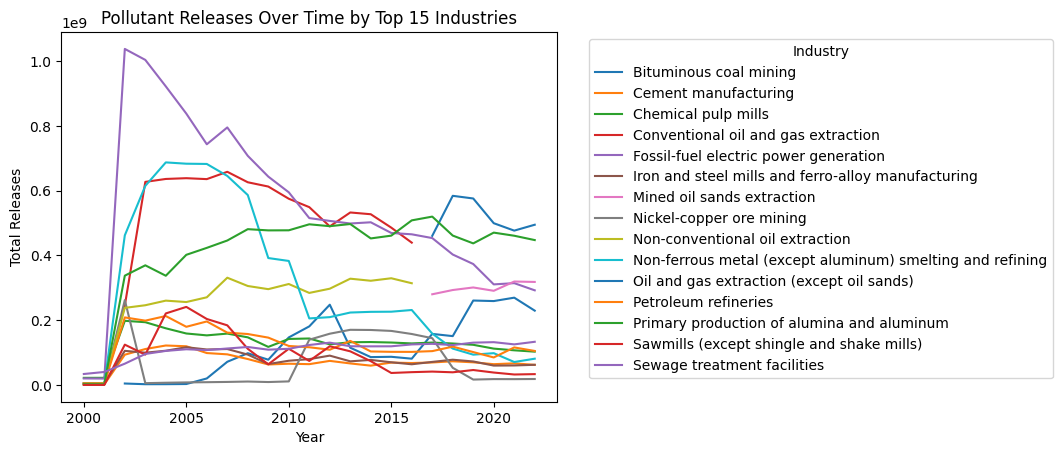

In [ ]:
# Calculate total releases per industry and get the top 15 industries
top_industries = df_releases_copy.groupby('NAICS Title / Titre Code_SCIAN')['total_releases'].sum().nlargest(15).index

# Filter the DataFrame to include only the top 15 industries
industry_trends = df_releases_copy[df_releases_copy['NAICS Title / Titre Code_SCIAN'].isin(top_industries)]

# Group by Year and Industry and sum releases
industry_trends = industry_trends.groupby(['Reporting_Year / Année', 'NAICS Title / Titre Code_SCIAN'])['total_releases'].sum().reset_index()

# Pivot the data for plotting
industry_trends_pivot = industry_trends.pivot(index='Reporting_Year / Année', columns='NAICS Title / Titre Code_SCIAN', values='total_releases')

# Plot
plt.figure(figsize=(14, 8))
industry_trends_pivot.plot(title="Pollutant Releases Over Time by Top 15 Industries")
plt.xlabel("Year")
plt.ylabel("Total Releases")
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Highest Releases by Industries

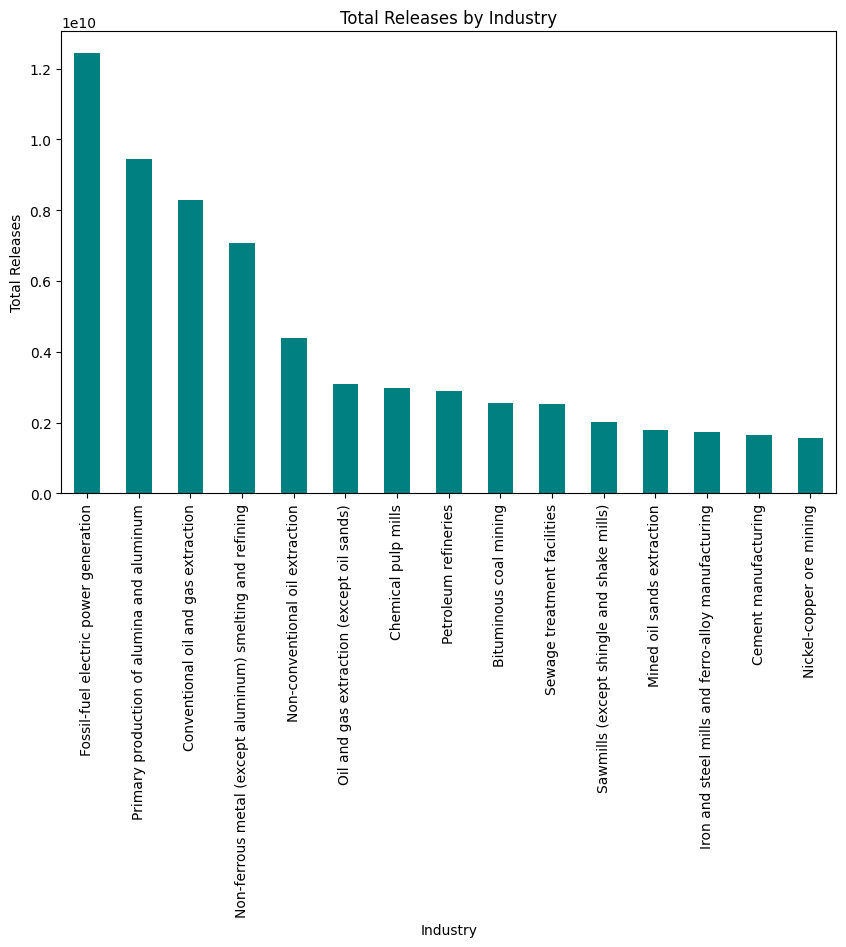

In [ ]:
# Calculate total releases by industry and get top 15
industry_totals = df_releases_copy.groupby('NAICS Title / Titre Code_SCIAN')['total_releases'].sum().nlargest(15)

# Plot bar chart
plt.figure(figsize=(10, 6))
industry_totals.plot(kind='bar', color='teal')
plt.title("Total Releases by Industry")
plt.xlabel("Industry")
plt.ylabel("Total Releases")
plt.xticks(rotation=90)
plt.show()

Pollutant Releases by Province

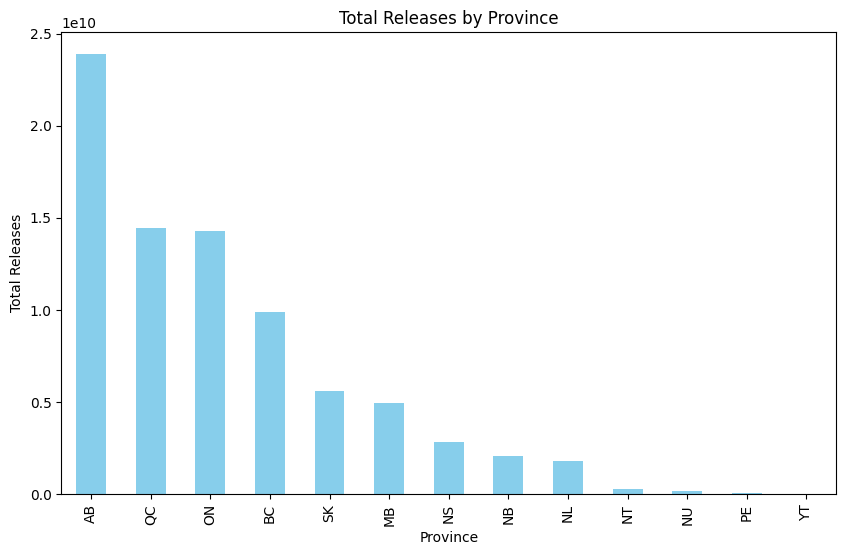

In [ ]:
province_totals = df_releases_copy.groupby('PROVINCE')['total_releases'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
province_totals.plot(kind='bar', color='skyblue')
plt.title("Total Releases by Province")
plt.xlabel("Province")
plt.ylabel("Total Releases")
plt.xticks(rotation=90)
plt.show()

Total Releases by air over the years

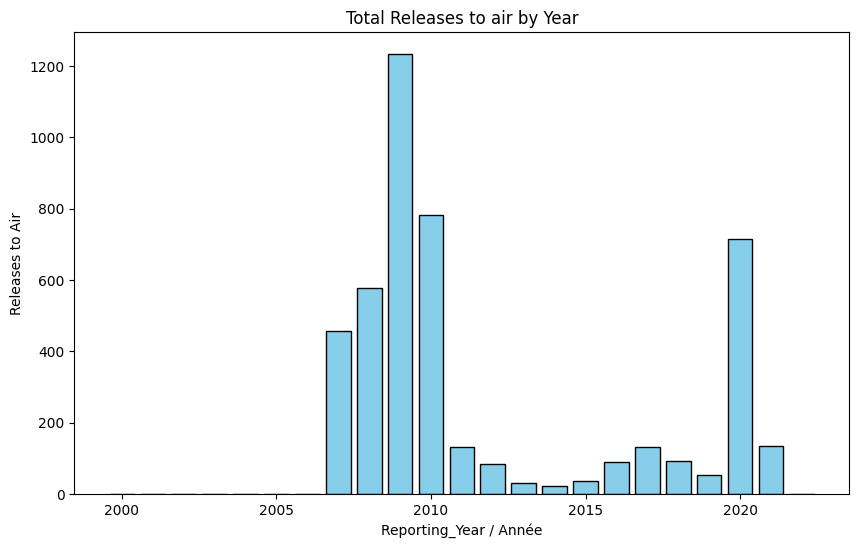

In [ ]:
# Sum Releases to Air Columns
releases_to_air = (
    df_releases['Release to Air - Fugitive'] +
    df_releases['Release to Air - Other Non-Point '] +
    df_releases['Release to Air - Road dust  '] +
    df_releases['Release to Air - Spills '] +
    df_releases['Release to Air - Stack / Point  '] +
    df_releases['Release to Air - Storage / Handling ']
)

# Group by Year and Sum
Total_releases_air = releases_to_air.groupby(df_releases['Reporting_Year / Année']).sum()

# Plotting bar chart with Year
plt.figure(figsize=(10, 6))
plt.bar(Total_releases_air.index, Total_releases_air.values, color='skyblue', edgecolor='black')
plt.title("Total Releases to air by Year")
plt.xlabel("Reporting_Year / Année")
plt.ylabel("Releases to Air")
plt.show()

Total releases by air per industry

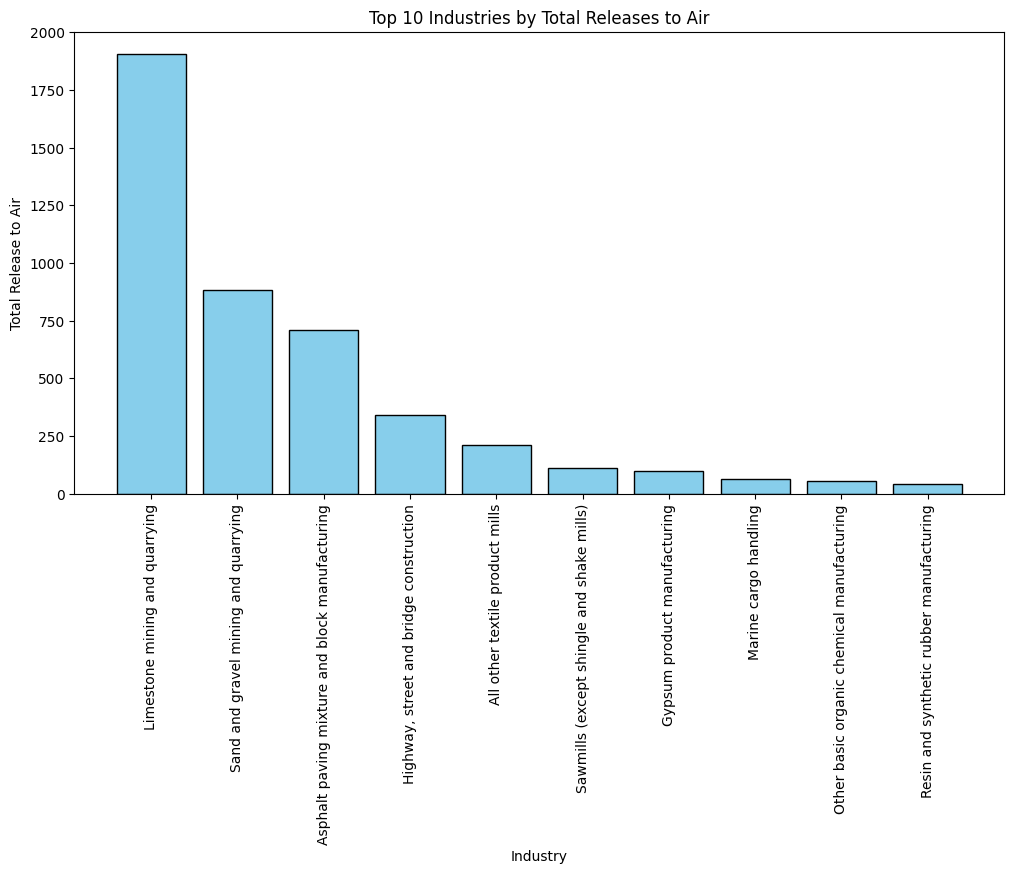

In [ ]:
# Group by Industry and Sum, sort and select top 10
total_releases_by_industry = releases_to_air.groupby(df_releases['NAICS Title / Titre Code_SCIAN']).sum()
top_industries = total_releases_by_industry.sort_values(ascending=False).head(10)

# Plotting the bar plot with industries on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(top_industries.index, top_industries.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Industries by Total Releases to Air")
plt.xlabel("Industry")
plt.ylabel("Total Release to Air")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if there are many industries
plt.show()

Total Releases by water over the years

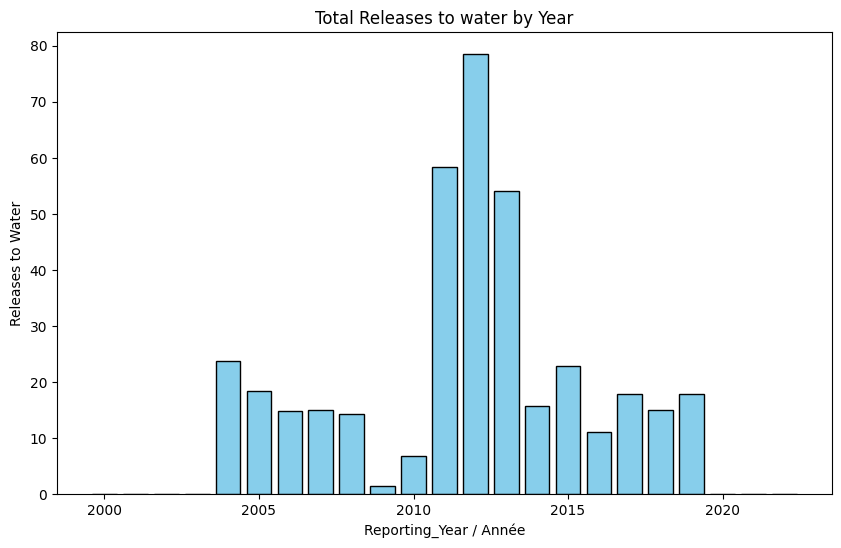

In [ ]:
#sum releases to water columns
releases_to_water = (
    df_releases['Releases to Water Bodies - Direct Discharges '] +
      df_releases[ 'Releases to Water Bodies - Leaks'] +
       df_releases['Releases to Water Bodies - Spills ']
)

# Group by Year and Sum
Total_releases_water = releases_to_water.groupby(df_releases['Reporting_Year / Année']).sum()

# Plotting the bar plot with Year on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(Total_releases_water.index, Total_releases_water.values, color='skyblue', edgecolor='black')
plt.title("Total Releases to water by Year")
plt.xlabel("Reporting_Year / Année")
plt.ylabel("Releases to Water")
plt.show()

Total releases by water for top 10 industries

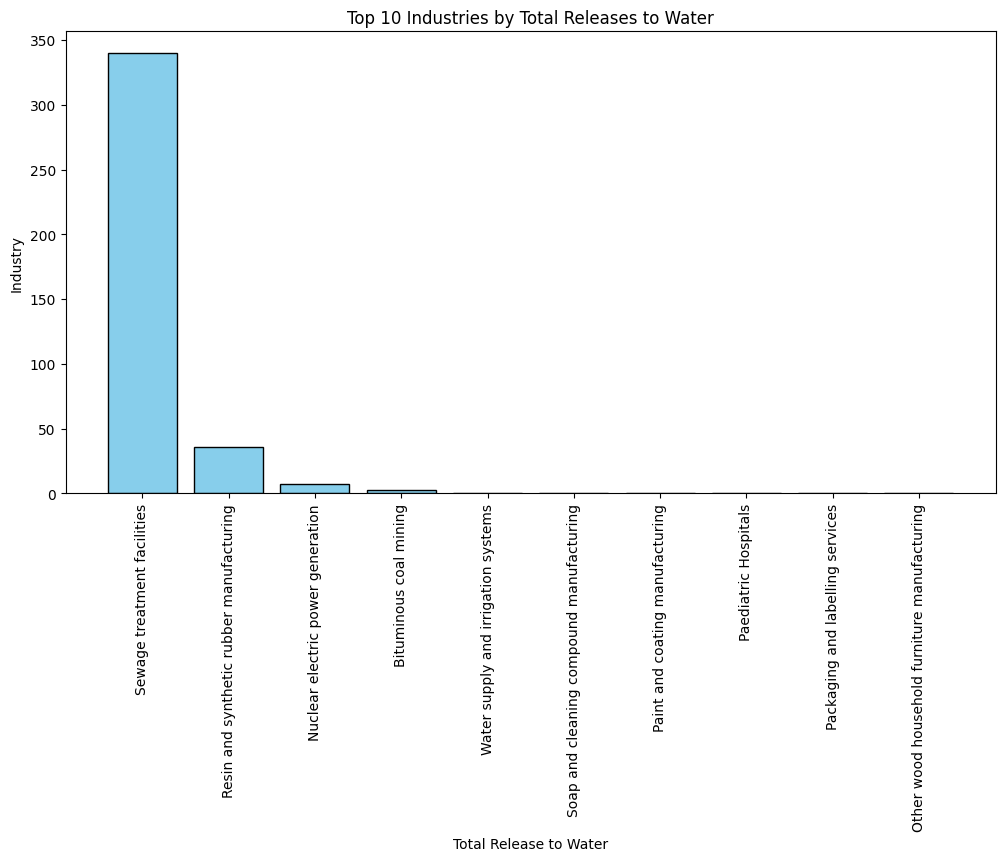

In [ ]:
# Group by Industry and Sum, sort and select top 10
total_releases_by_industry = releases_to_water.groupby(df_releases['NAICS Title / Titre Code_SCIAN']).sum()
top_industries = total_releases_by_industry.sort_values(ascending=False).head(10)

# Plotting the bar plot with industries on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(top_industries.index, top_industries.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Industries by Total Releases to Water")
plt.xlabel("Total Release to Water")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if there are many industries
plt.show()

Total Releases by land over the years

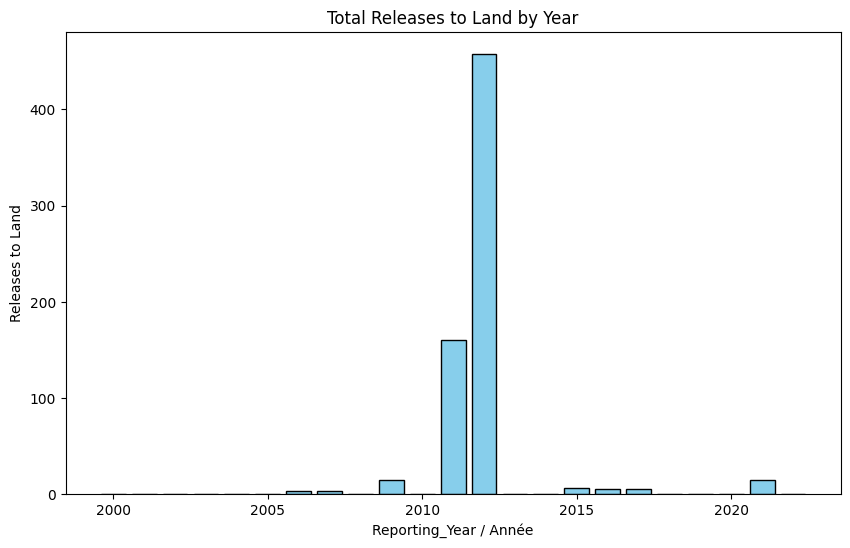

In [ ]:
#sum releases to land columns
releases_to_land = (
      df_releases['Releases to Land - Leaks'] +
       df_releases['Releases to Land - Other '] +
       df_releases['Releases to Land - Spills ']
)

# Group by Year and Sum
Total_releases_land = releases_to_land.groupby(df_releases['Reporting_Year / Année']).sum()

# Plotting the bar plot with Year on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(Total_releases_land.index, Total_releases_land.values, color='skyblue', edgecolor='black')
plt.title("Total Releases to Land by Year")
plt.xlabel("Reporting_Year / Année")
plt.ylabel("Releases to Land")
plt.show()

Total releases by land in top 10 industries

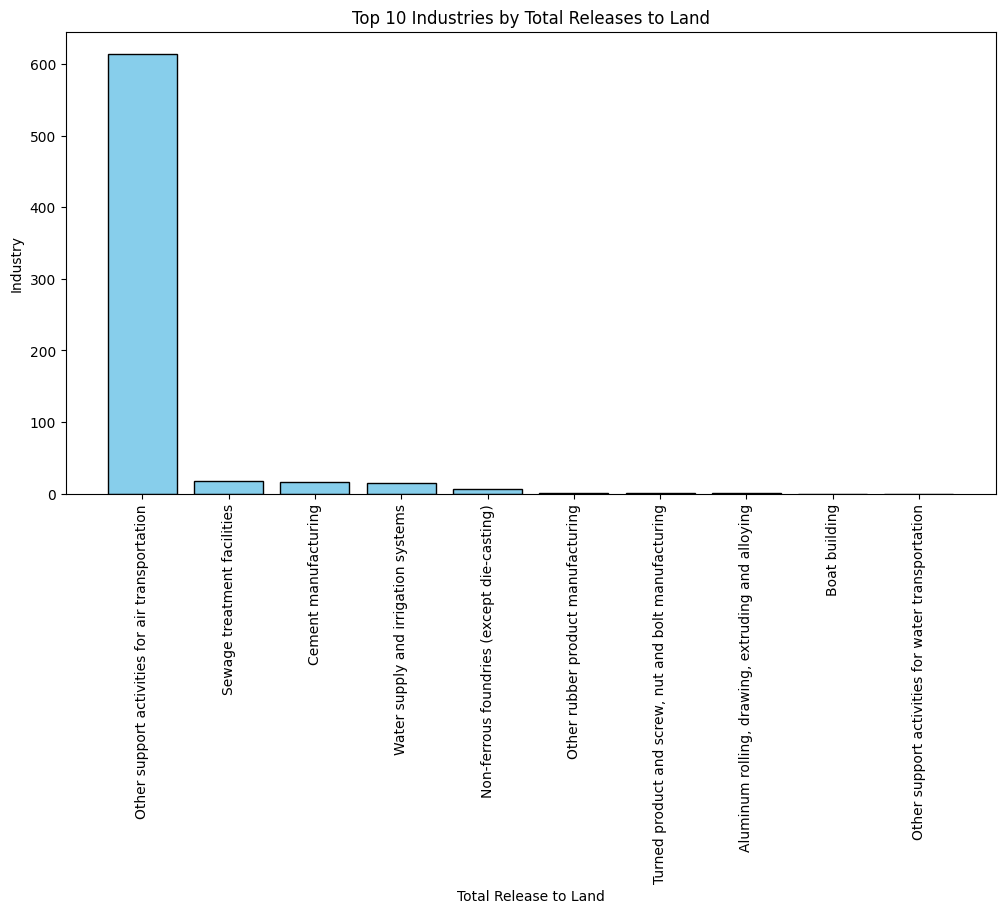

In [ ]:
# Group by Industry and Sum, sort and select top 10
total_releases_by_industry = releases_to_land.groupby(df_releases['NAICS Title / Titre Code_SCIAN']).sum()
top_industries = total_releases_by_industry.sort_values(ascending=False).head(10)

# Plotting the bar plot with industries on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(top_industries.index, top_industries.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Industries by Total Releases to Land")
plt.xlabel("Total Release to Land")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if there are many industries
plt.show()

Correlation Heatmap between release amounts, industry types, provinces

<ipython-input-56-265408d81aaf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['NAICS Title / Titre Code_SCIAN'] = label_encoder.fit_transform(correlation_data['NAICS Title / Titre Code_SCIAN'])
<ipython-input-56-265408d81aaf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['PROVINCE'] = label_encoder.fit_transform(correlation_data['PROVINCE'])


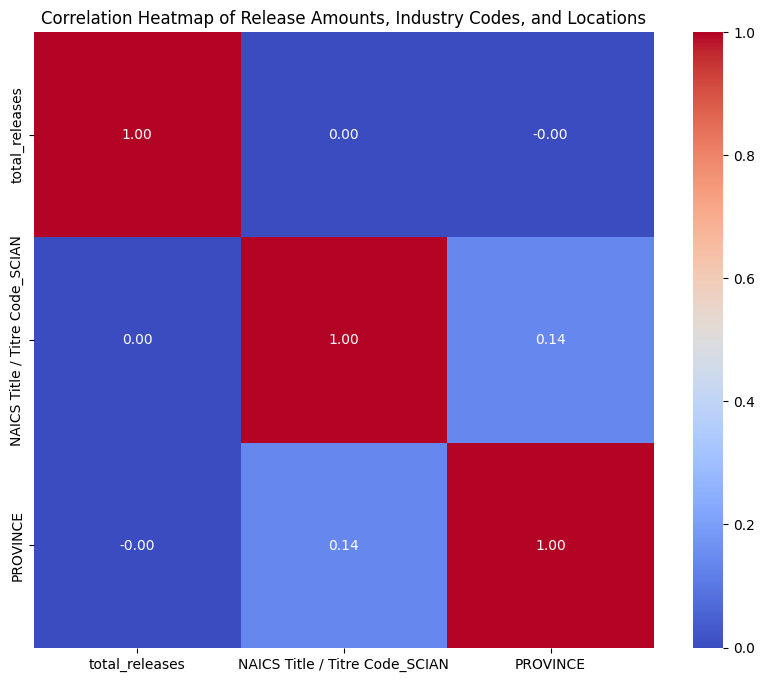

In [ ]:
# Create a subset of the data with relevant numerical columns for correlation analysis
correlation_data = df_releases_copy[['total_releases','NAICS Title / Titre Code_SCIAN', 'PROVINCE']]

# Convert 'NAICS Title / Titre Code_SCIAN' and 'PROVINCE' to numerical representations
# Label Encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
correlation_data['NAICS Title / Titre Code_SCIAN'] = label_encoder.fit_transform(correlation_data['NAICS Title / Titre Code_SCIAN'])
correlation_data['PROVINCE'] = label_encoder.fit_transform(correlation_data['PROVINCE'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Release Amounts, Industry Codes, and Locations")
plt.show()

Boxplot to identify outliers

([0], [Text(0, 0, '')])

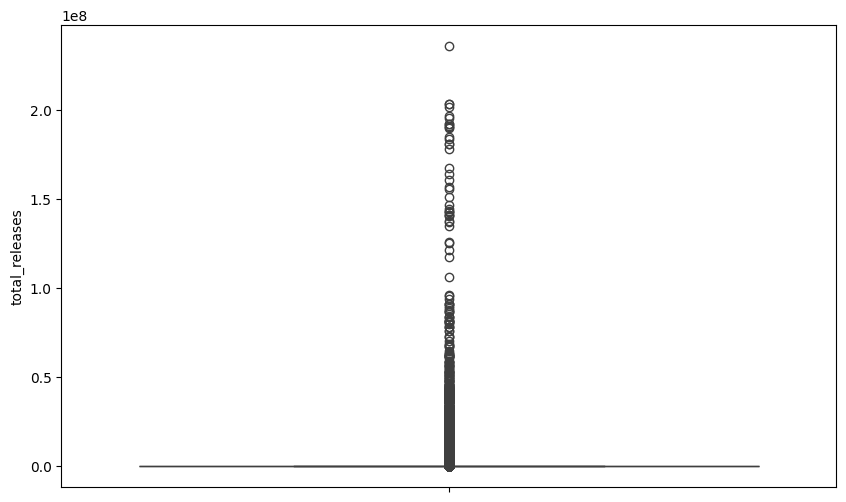

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_releases', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

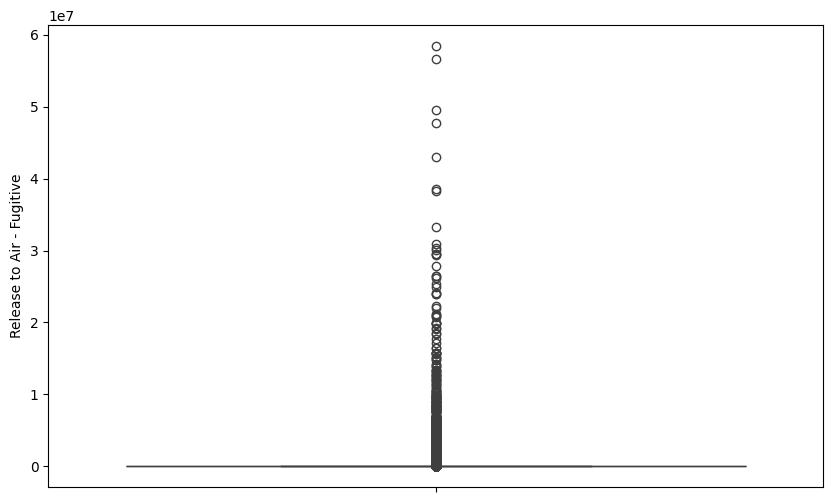

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Fugitive', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

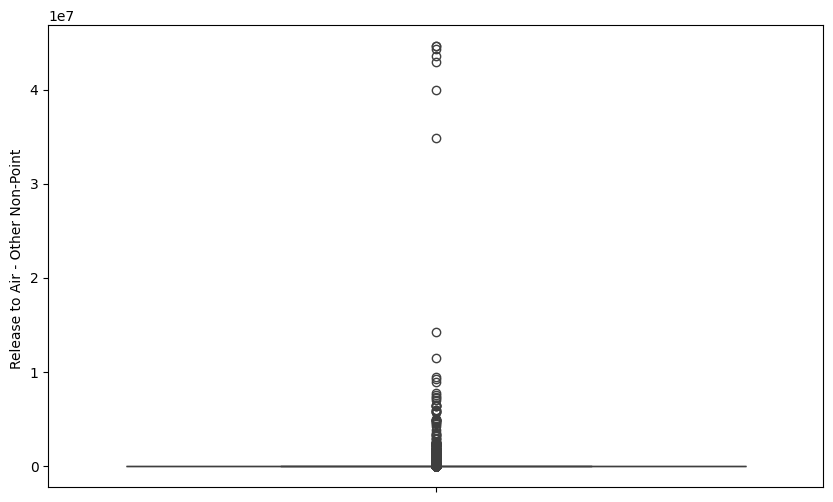

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Other Non-Point ', data=df_releases_copy)
plt.xticks(rotation=90)



([0], [Text(0, 0, '')])

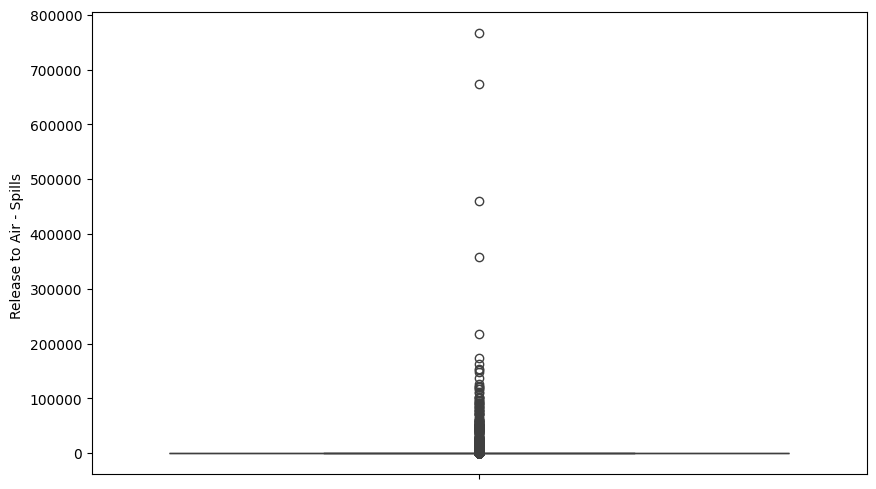

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Spills ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

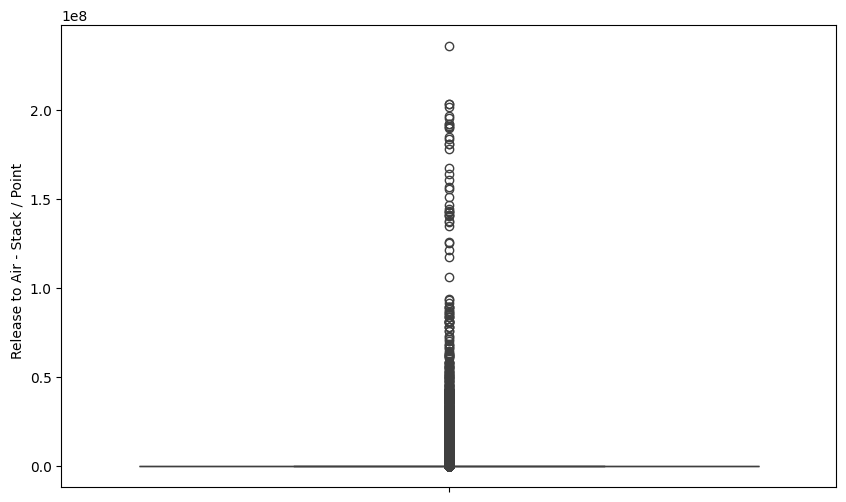

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Stack / Point  ', data=df_releases_copy)
plt.xticks(rotation=90)


([0], [Text(0, 0, '')])

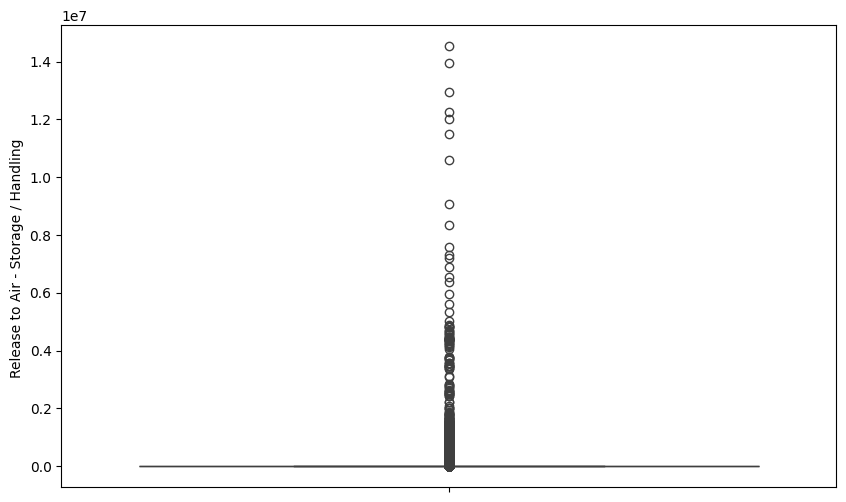

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Storage / Handling ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

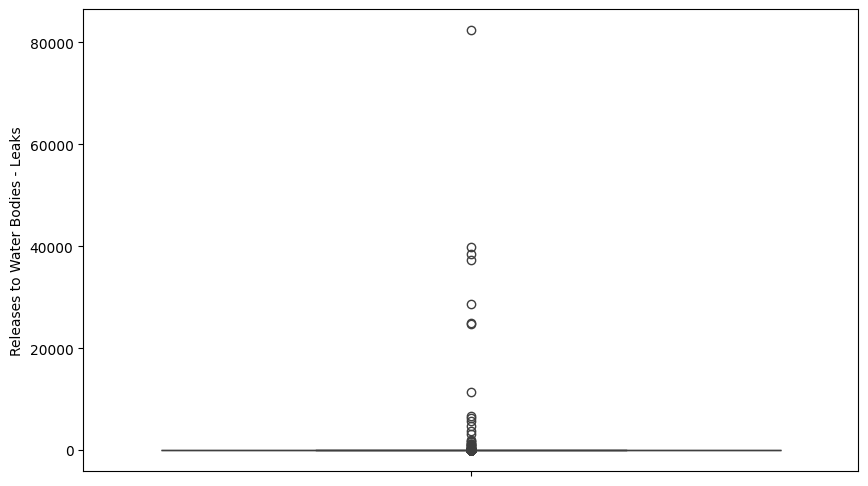

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Water Bodies - Leaks', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

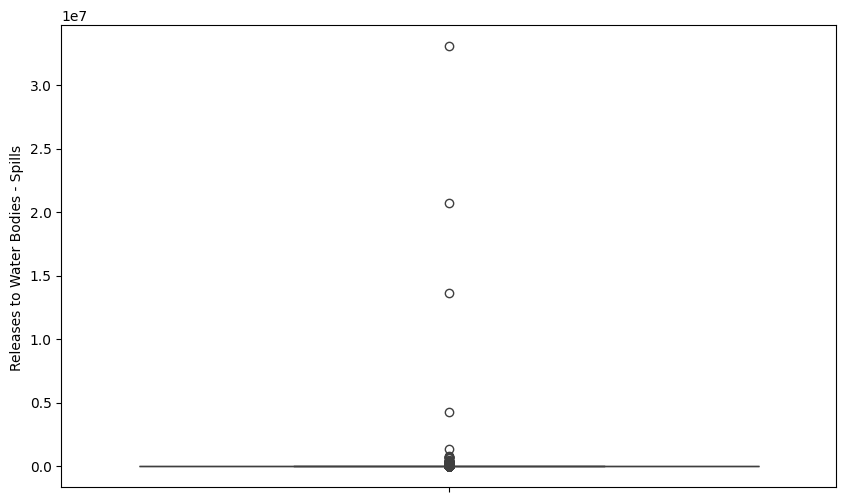

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Water Bodies - Spills ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

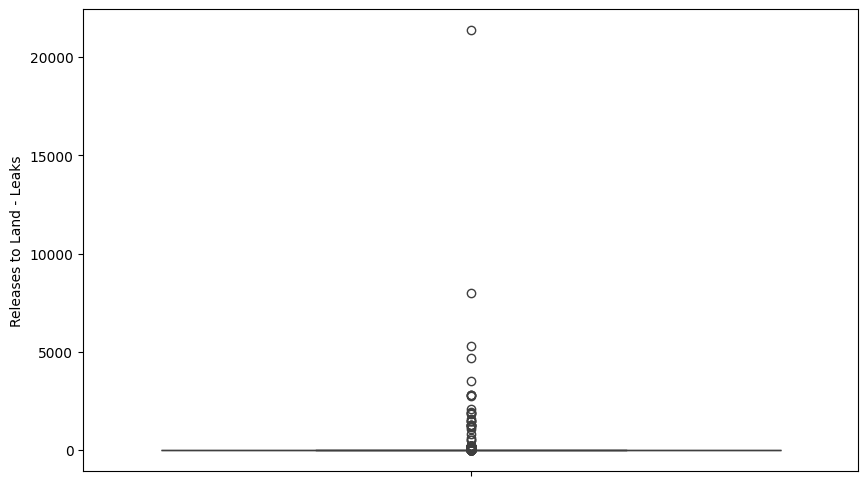

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Land - Leaks', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

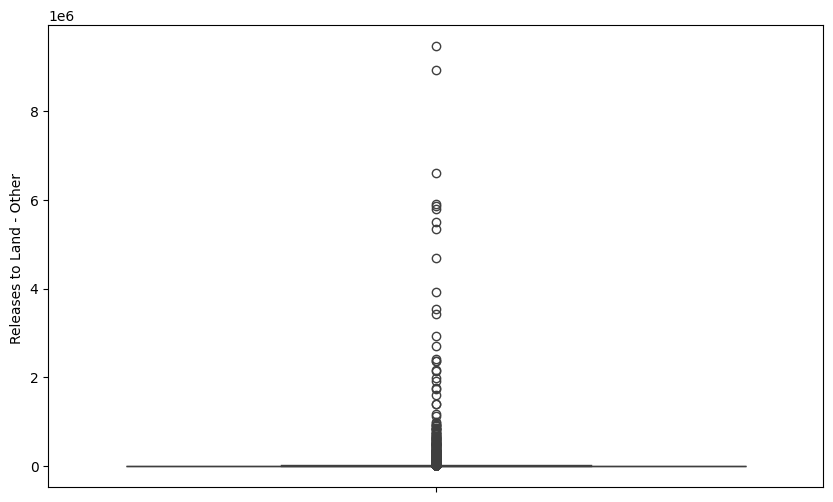

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Land - Other ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

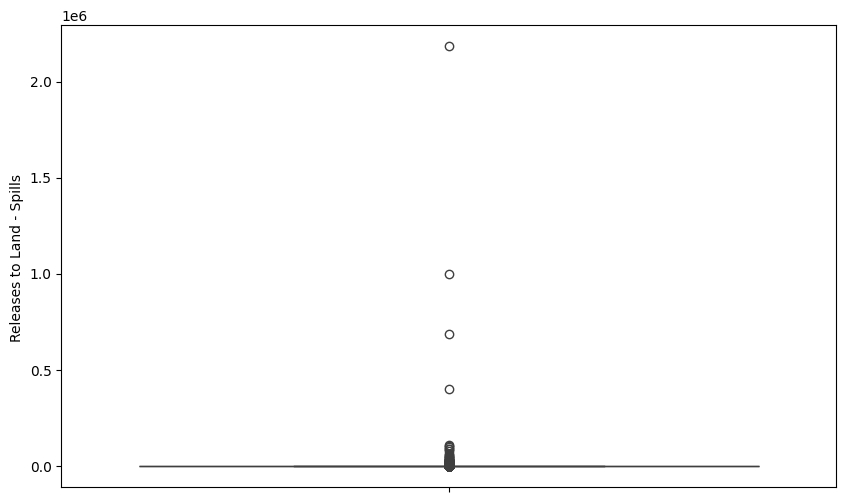

In [ ]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Land - Spills ', data=df_releases_copy)
plt.xticks(rotation=90)

# DATA CLEANING

In [ ]:
#Creating a copy for cleaning
df_analysis = df_releases.copy()

In [ ]:
# making the column headings consistent
df_analysis.columns = [col.lower().split(' / ')[0].strip().replace(' ', '_') for col in df_analysis.columns]

In [ ]:
df_analysis.columns

Index(['reporting_year', 'npri_id', 'number_of_employees', 'company_name',
       'facility_name', 'naics', 'naics_title', 'province', 'city', 'latitude',
       'longitude', 'cas_number', 'substance_name_(english)', 'units',
       'estimation_method', 'release_to_air_-_fugitive',
       'release_to_air_-_other_non-point', 'release_to_air_-_road_dust',
       'release_to_air_-_spills', 'release_to_air_-_stack',
       'release_to_air_-_storage', 'releases_to_land_-_leaks',
       'releases_to_land_-_other', 'releases_to_land_-_spills',
       'releases_to_water_bodies_-_direct_discharges',
       'releases_to_water_bodies_-_leaks', 'releases_to_water_bodies_-_spills',
       'sum_of_release_to_all_media_(<1tonne)'],
      dtype='object')

##Data type conversion

In [ ]:
# Convert "Reporting_Year" to datetime format (using only the year)
df_analysis['reporting_year'] = pd.to_datetime(df_analysis['reporting_year'], format='%Y')

#Convert selected object columns to categorical type
categorical_columns = [
    'company_name', 'facility_name',
    'naics', 'province', 'city', 'cas_number',
    'substance_name_(english)', 'units',
    'estimation_method'
]
df_analysis[categorical_columns] = df_analysis[categorical_columns].astype('category')

# Check data types to confirm conversions
df_analysis.dtypes
df_analysis[categorical_columns] = df_analysis[categorical_columns].astype('category')

# Check data types to confirm conversions
df_analysis.dtypes

,0
reporting_year,datetime64[ns]
npri_id,int64
number_of_employees,object
company_name,category
facility_name,category
naics,category
naics_title,object
province,category
city,category
latitude,float64


In [ ]:
df_analysis.isnull().sum()

,0
reporting_year,0
npri_id,0
number_of_employees,616
company_name,0
facility_name,1176
naics,0
naics_title,0
province,0
city,90764
latitude,4082


Splitting data into 80 percent training and 20% validation

In [ ]:
# Sort data by year to ensure chronological splitting
df_industry_yearly_releases = df_analysis.sort_values(by='reporting_year')

# Determine the split point (80% for training, 20% for validation)
split_point = int(len(df_industry_yearly_releases) * 0.8)

# Find the year at the split point for chronological splitting
#iloc used to retrieve the year at the 80% index of the split_point
split_year = df_industry_yearly_releases.iloc[split_point]['reporting_year']
# Split data chronologically
train_data = df_industry_yearly_releases[df_industry_yearly_releases['reporting_year'] <= split_year]
validation_data = df_industry_yearly_releases[df_industry_yearly_releases['reporting_year'] > split_year]

# Display shapes of the splits to verify
print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)

Training Data Shape: (611587, 28)
Validation Data Shape: (125929, 28)


In [ ]:
train_data.head()

,reporting_year,npri_id,number_of_employees,company_name,facility_name,naics,naics_title,province,city,latitude,longitude,cas_number,substance_name_(english),units,estimation_method,release_to_air_-_fugitive,release_to_air_-_other_non-point,release_to_air_-_road_dust,release_to_air_-_spills,release_to_air_-_stack,release_to_air_-_storage,releases_to_land_-_leaks,releases_to_land_-_other,releases_to_land_-_spills,releases_to_water_bodies_-_direct_discharges,releases_to_water_bodies_-_leaks,releases_to_water_bodies_-_spills,sum_of_release_to_all_media_(<1tonne)
0,2000-01-01,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6187,2000-01-01,3901,209,PETRO-CANADA,OAKVILLE REFINERY,324110,Petroleum refineries,ON,Oakville,43.390100,-79.730000,218-01-9,Chrysene,kg,E - Emission Factor,10.374,15.430,NaN,NaN,0.005,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6188,2000-01-01,3901,209,PETRO-CANADA,OAKVILLE REFINERY,324110,Petroleum refineries,ON,Oakville,43.390100,-79.730000,218-01-9,Chrysene,kg,O - Engineering Estimates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,NaN,NaN,NaN,NaN
6189,2000-01-01,3901,209,PETRO-CANADA,OAKVILLE REFINERY,324110,Petroleum refineries,ON,Oakville,43.390100,-79.730000,224-42-0,"Dibenz[a,j]acridine",kg,E - Emission Factor,0.277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6190,2000-01-01,3901,209,PETRO-CANADA,OAKVILLE REFINERY,324110,Petroleum refineries,ON,Oakville,43.390100,-79.730000,50-32-8,Benzo[a]pyrene,kg,E - Emission Factor,3.844,1.433,NaN,NaN,0.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.isnull().sum()

,0
reporting_year,0
npri_id,0
number_of_employees,443
company_name,0
facility_name,1151
naics,0
naics_title,0
province,0
city,55360
latitude,3280


In [ ]:
validation_data.head()

,reporting_year,npri_id,number_of_employees,company_name,facility_name,naics,naics_title,province,city,latitude,longitude,cas_number,substance_name_(english),units,estimation_method,release_to_air_-_fugitive,release_to_air_-_other_non-point,release_to_air_-_road_dust,release_to_air_-_spills,release_to_air_-_stack,release_to_air_-_storage,releases_to_land_-_leaks,releases_to_land_-_other,releases_to_land_-_spills,releases_to_water_bodies_-_direct_discharges,releases_to_water_bodies_-_leaks,releases_to_water_bodies_-_spills,sum_of_release_to_all_media_(<1tonne)
639594,2020-01-01,23185,13,Richardson Pioneer Ltd.,Balgonie,493110,General warehousing and storage,SK,Balgonie,50.4915,-104.2737,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.00003,0.6948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639614,2020-01-01,23191,6,ARC RESOURCES LTD.,Lator #1 01-21-063-02W6,211110,Oil and gas extraction (except oil sands),AB,NaN,54.4394,-118.2504,NA - M16,Volatile Organic Compounds (VOCs),tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,9.10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639615,2020-01-01,23191,6,ARC RESOURCES LTD.,Lator #1 01-21-063-02W6,211110,Oil and gas extraction (except oil sands),AB,NaN,54.4394,-118.2504,7446-09-05,Sulphur dioxide,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639616,2020-01-01,23192,53,Shawcor,Shaw Pipe Protection Ltd - Camrose 39st,332810,"Coating, engraving, cold and heat treating and...",AB,Camrose,53.0292,-112.8058,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,E2 - Published Emission Factors,NaN,NaN,1.923,NaN,0.06000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639617,2020-01-01,23194,2,Tourmaline Oil Corp,Duvernay Fir Central 09-29-057-21-W5,211110,Oil and gas extraction (except oil sands),AB,Calgary,53.9575,-117.0766,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,190.54640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
validation_data.isnull().sum()

,0
reporting_year,0
npri_id,0
number_of_employees,173
company_name,0
facility_name,25
naics,0
naics_title,0
province,0
city,35404
latitude,802


In [ ]:
# Identify numeric and categorical columns
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns

# Handle missing values in train_data
# Impute numeric columns with the median
train_data.loc[:, numeric_cols] = train_data[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Impute categorical columns with the mode (most frequent value)
train_data.loc[:, categorical_cols] = train_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Handle missing values in validation_data
# For consistency, apply the same median/mode values from train_data to validation_data
validation_data.loc[:, numeric_cols] = validation_data[numeric_cols].apply(lambda x: x.fillna(train_data[x.name].median()))
validation_data.loc[:, categorical_cols] = validation_data[categorical_cols].apply(lambda x: x.fillna(train_data[x.name].mode()[0]))

# Verify that there are no remaining missing values in either dataset
train_missing = train_data.isnull().sum().sum()
validation_missing = validation_data.isnull().sum().sum()
train_missing, validation_missing

<ipython-input-96-6da5ce200788>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.loc[:, categorical_cols] = train_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


(0, 0)

In [ ]:
#verifying there are no missing values
train_data.isnull().sum()

,0
reporting_year,0
npri_id,0
number_of_employees,0
company_name,0
facility_name,0
naics,0
naics_title,0
province,0
city,0
latitude,0


In [ ]:
#verifying there are no missing values
validation_data.isnull().sum()

,0
reporting_year,0
npri_id,0
number_of_employees,0
company_name,0
facility_name,0
naics,0
naics_title,0
province,0
city,0
latitude,0
